<a href="https://colab.research.google.com/github/omaskii/Portfolio_Projects_Python/blob/main/FAIML_Project_LearnerNotebook_LowCode%2B_281_29_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Fundamentals of AIML: Cardio Good Fitness Data Analysis**
**Solomon Akatakpo (Ph.D)**

## **Context**

Cardio Good Fitness is a leading manufacturer of high-quality treadmills. The company offers three main products: the TM195, the TM498, and the TM798, which is their flagship product. With the rising demand for fitness in the market and an increasing number of competitors, Cardio Good Fitness wants to gain a better understanding of its existing customer profiles in order to develop more targeted marketing and product development strategies. They believe this will allow them to meet the needs and preferences of their customers, increase customer satisfaction, and drive revenue growth.

<br>

## **Objective**

In order to gain insights into its customer profiles, Cardio Good Fitness has collected demographic and product usage information for each of its customers. The dataset includes variables such as age, gender, income, and miles run on the treadmill for each of the three products.

Suppose you are hired as a Data Scientist in this company and the Data Science team has shared the data with you. The requirement is to analyze the data and identify patterns in product usage and the key characteristics of customers by conducting exploratory data analysis (EDA) to come up with customer profiles.

The goal is to answer key questions such as:

* What are the key characteristics of customers who purchase each product?
* How does product usage vary by each group?

<br>

## **Data Description**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-


* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. number of times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

### Importing the required libraries - 

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
cardio_df = pd.read_csv('/content/drive/MyDrive/Data_Science/Project1/CardioGoodFitness.csv')
# Returns the first 5 rows
cardio_df.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# copying data to another variable to avoid any changes to original data
cardio = cardio_df.copy()

In [ ]:
# returns the first 5 rows
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### Observations: 
The product column contains the model number of treadmill

The Age, Gender, Education and MArital Status columns contain information relating to the age of the customer, the gender of the customer, the educational level of the customer in number of years, and the marital status of the customer.

The Usage column contains the average number of times the customer wants to use the treadmill every week.

Fitness column contains the rating given by a customer in his fitness.

Income coulmn contains the income of the customer.

Miles column contains the number of miles that the customer expects to run.




### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
cardio_df.shape

(180, 9)

#### Observations: 
There are 180 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations: 
All the columns have 180 observations indicating that there are no missing values

The data has 3 object type columns and 6 numerical columns

### **Question 3:** Write a code to convert the data type of the object type variables to the 'categorical' type to reduce memory usage. [0.5 mark]


In [ ]:
#Write the appropriate function to convert the data type into 'category' for each column
cardio_df["Product"] = cardio_df["Product"].astype("category") 
cardio_df["Gender"] = cardio_df["Gender"].astype("category")
cardio_df["MaritalStatus"] = cardio_df["MaritalStatus"].astype("category")
cardio_df["Fitness"] = cardio_df["Fitness"].astype("category")

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


### Observations: 
The Product, Gender, MaritalStatus and Fitness columns have now been converted into categorical type variables

### **Question 4:** Are there any missing values in the data? If yes, treat them using an appropriate method. [0.5 mark]

In [ ]:
# Checking for missing values in the data
cardio_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Observations: 
There are no missing values in the data sets

### **Question 5:** Check the statistical summary of the data. Which product type has had the highest number of sales? [1 marks]

In [ ]:
# Get the summary statistics of the numerical data
cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Observations: 
The average age of the customers is 28.7 years. The oldest customer is 50 years old while the youngest customer is 18 years old

The average education years of the customers is 15.6 years. Maximum education is 21 years while minimum education is 12 years

On average, customers intend to use the treadmill 3.4 times in a week. They do not plan to use the treadmill for more than 7 times in a week.

There is a considerable difference between the 3rd quartile and the maximum number of miles that the customer expects to run.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

Please run the below user-defined function for the univariate analysis.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on Age

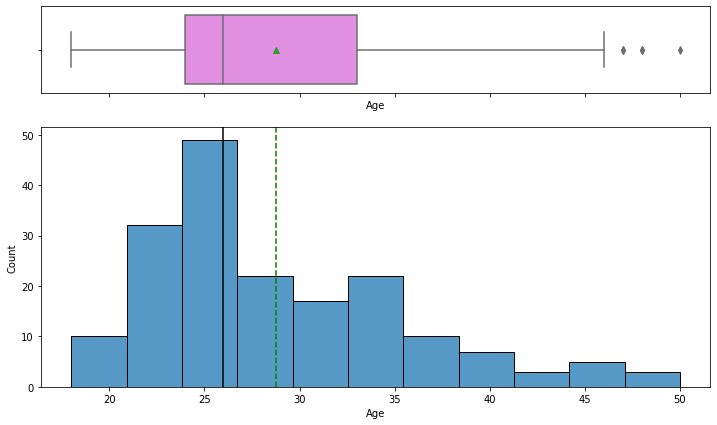

In [ ]:
histogram_boxplot(cardio_df, "Age")

### Observations: 
The distribution of age is skewed to the right

The age column contain 3 outliers

More customers fall between the 18 - 36 years bracket

## Observations on Education

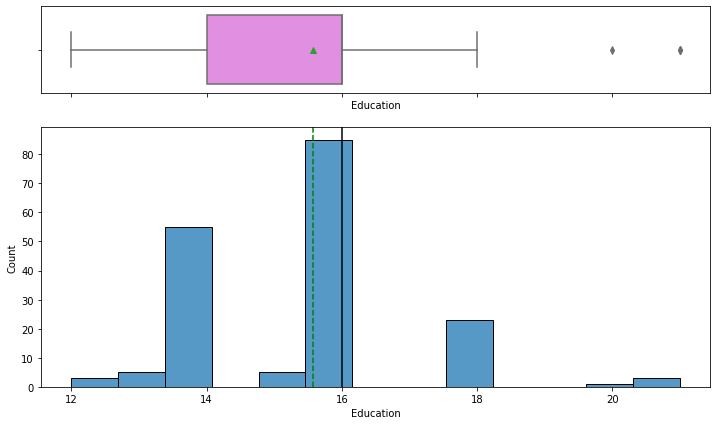

In [ ]:
histogram_boxplot(cardio_df, "Education") ## Complete the code

### Observations:
Mean education of customers is about 15.6 years.

More customers (~90) completed 16 years education, while only 2 - 3 customers completed the 20 years to 21 years of education

There are 2 outliers in the Education column

## Observations on Usage

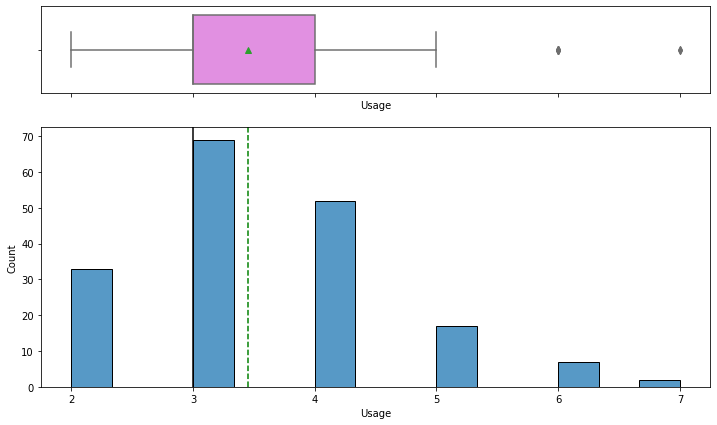

In [ ]:
histogram_boxplot(cardio_df, "Usage") ## Complete the code

### Observations:
On average, more customers like to use the treadmill during the week.

There are 2 outliers in the usage column. These are not outrageous numbers, just the number of customers who use the treadmill almost everyday.

It will be interesting to see how age impact usage

## Observations on Income

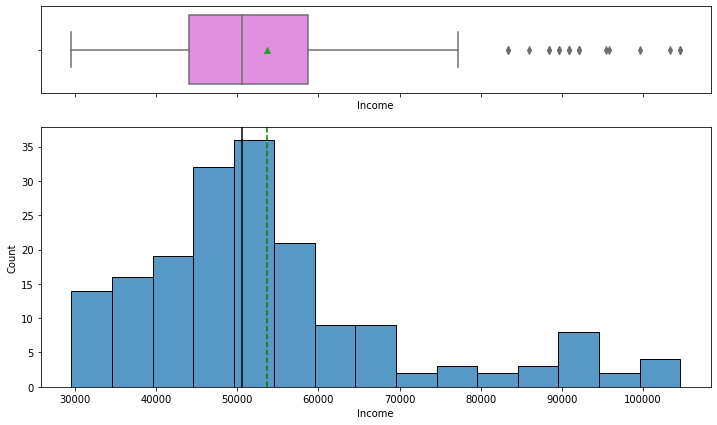

In [ ]:
histogram_boxplot(cardio_df, "Income") 

### Observations:
The income is right skewed

Mean income of the customers is $53719

The income data contain some outliers. These indicate the wide income gap of high earning customers from low earning customers





## Observations on Miles

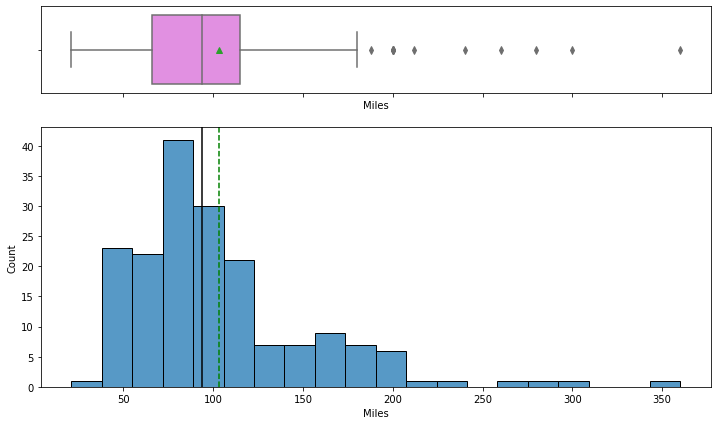

In [ ]:
histogram_boxplot(cardio_df, "Miles")

### Observations:

Mean number of miles that customers expect to run is 103 miles

The miles values contain some outliers 

Will be interesting to see the relationship between miles and age 

Now, we will be creating barplots for the categorical variables in the dataset -

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on Product

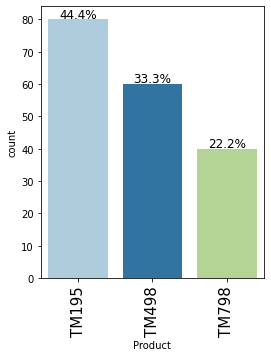

In [ ]:
labeled_barplot(cardio_df, "Product", perc=True)

### Observations:
There are more TM195 treadmills i.e 80. This is closely followed by TM498 (60) and TM798 (40) in the Cardio Good Fitness Center

### Observations on Gender

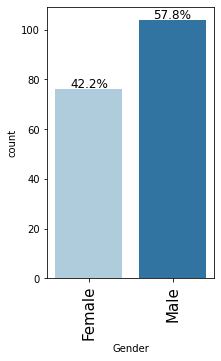

In [ ]:
labeled_barplot(cardio_df, "Gender", perc=True)

### Observations:
There are more male (57.8%) customers than female (42.2%) customers. 

## Observations on Marital Status

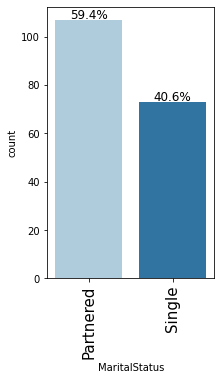

In [ ]:
labeled_barplot(cardio_df, "MaritalStatus", perc=True)

### Observations:
There are less single customers than partnered members. This may be due to the fact that some people enjoy going to the gym with their partners


## Observations on Fitness

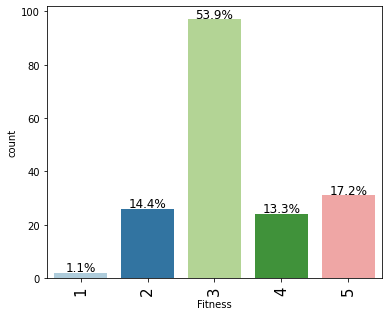

In [ ]:
labeled_barplot(cardio_df, "Fitness", perc=True)

### Observations:
More customers rate themselves to be moderately fit i.e. 53.9%. Only 1.1% rate themselves to be very unfit while 17.2% rate themselves to be very fit. W

Will be interesting how this fitness rating relates to age

## Observations on Education

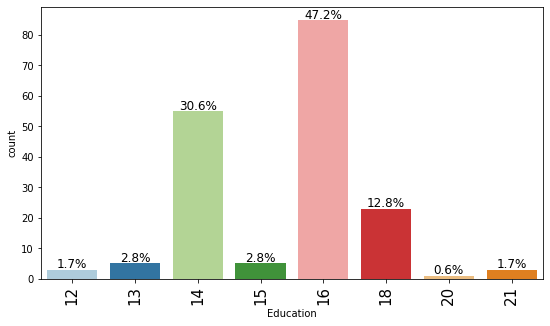

In [ ]:
labeled_barplot(cardio_df, "Education", perc=True)

### Observations:
More customers have completed the 16 years education (42.7%). This is closely followed by 14 years.

Will be interesting to see how education correlates with members income

## Observations on Usage

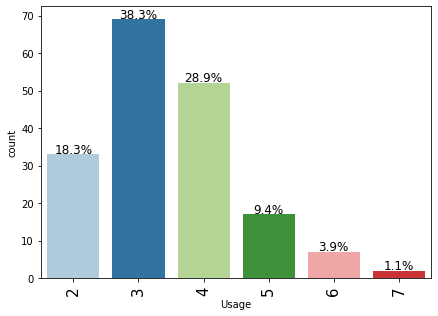

In [ ]:
labeled_barplot(cardio_df, "Usage", perc=True) 

### Observations:
More customers want to use the gym on average 3 - 4 times a week. 

Only a small percentage of customers plan to use the gym everyday of the week.

### **Bivariate and Multivariate Analysis**

### **Question 7:** Perform bivariate and multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [12 marks]

### **Bivariate Analysis**

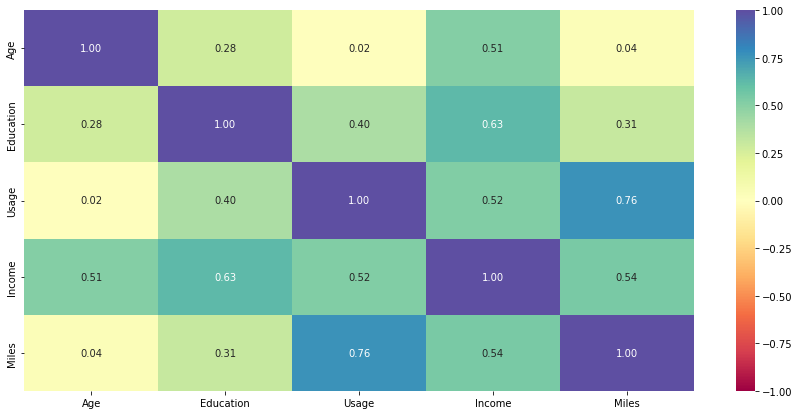

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(cardio_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations:
As expected, there is a strong correlation between miles that a customer expects to run and the average number of time the customer plans to use the treadmill every week.

There is low correlation between miles and age. 

There is only a moderate correlation between income and age. However, there is a slightly higher correlation between income and education.

Correlation does not infer causation. There is a weak link between usage and age

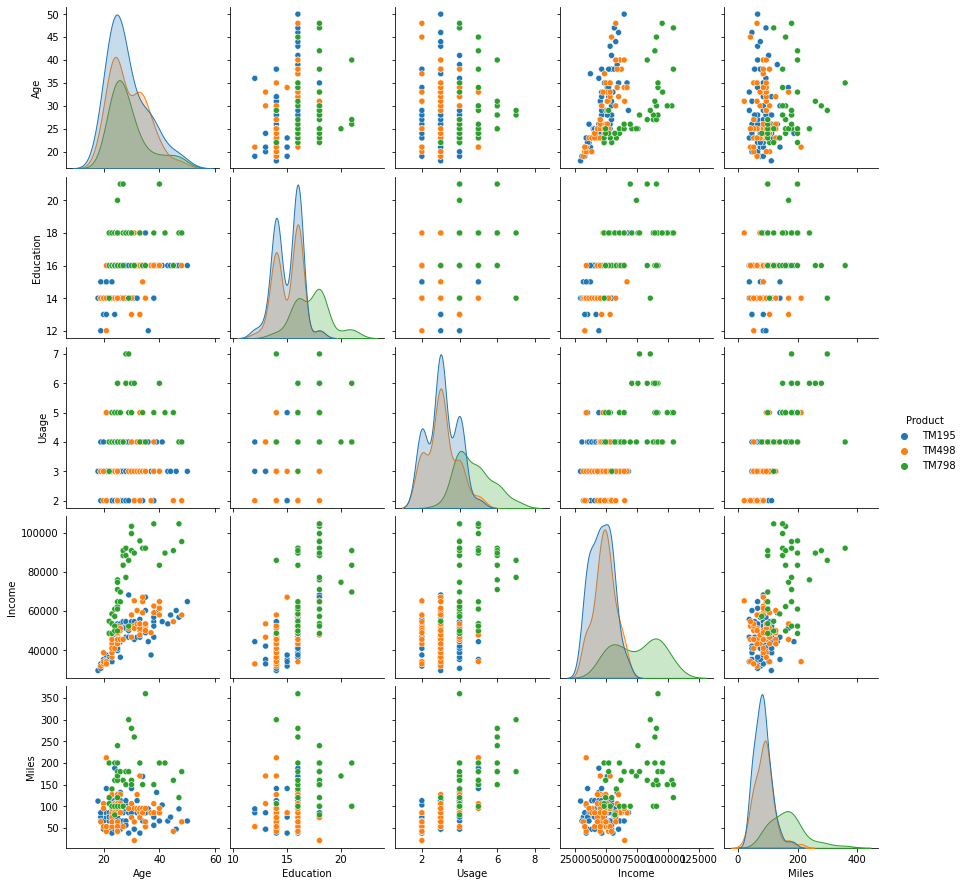

In [ ]:
sns.pairplot(data=cardio_df.drop(["Fitness"],axis=1),hue="Product", diag_kind="kde")
plt.show()

### Observations:
The findings from this pairplot are similar to those obtained from the heatmap above

### Product vs Age

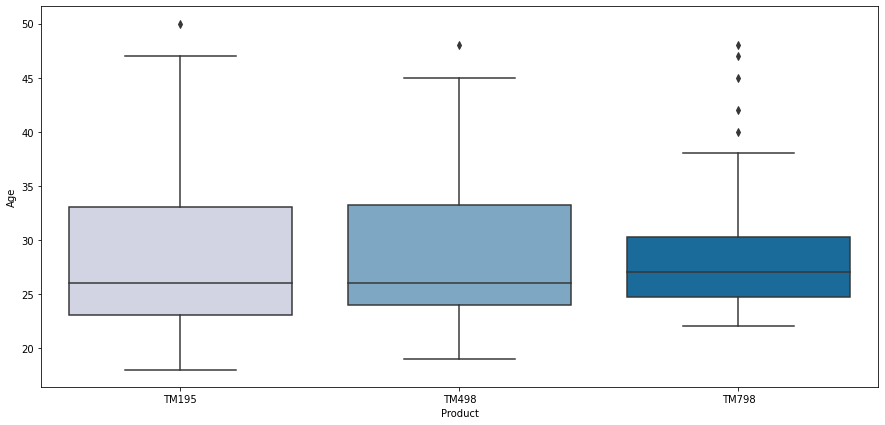

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Product"], y = cardio_df["Age"],palette="PuBu")
plt.show()

### Observations:
The median age for customers who use the different products does not vary much

Higher spread of users (in terms of age) for the TM195 treadmill and the least spread of age for customers who prefer to use the TM798 treadmill.

More outliers found in the TM798 product use by age

## Product vs Education

<Axes: xlabel='Product', ylabel='Education'>

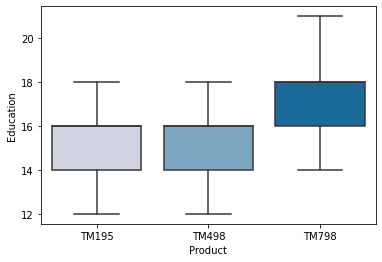

In [ ]:
sns.boxplot(data = cardio_df, x = cardio_df["Product"], y = cardio_df["Education"],palette="PuBu") 

### Observations:
Customers with more education prefer to use the TM798 model treadmill

The TM195 and TM498 product have similar preference for customers with 12 to 18 years of education completed.

## Product vs Usage

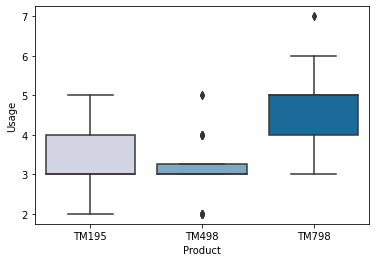

In [ ]:
sns.boxplot(data = cardio_df, x = cardio_df["Product"], y = cardio_df["Usage"],palette="PuBu"); 


### Observations:
The observation here is that the TM198 model treadmill is the most preferred customers while the TM498 is the least preferred for ciustomer usage per week.

## Product vs Income

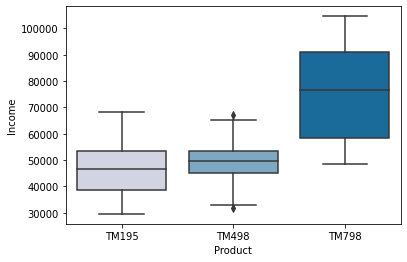

In [ ]:
sns.boxplot(data = cardio_df, x = cardio_df["Product"], y = cardio_df["Income"],palette="PuBu"); 

### Observations:
Higher income customers prefer the treadmill TM798 model

Customers in the lower income bracket use TM195 and TM498


## Product vs Miles

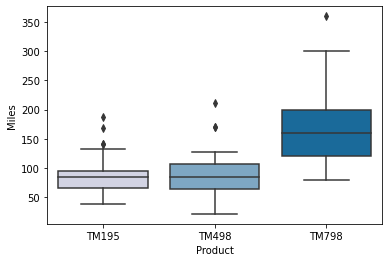

In [ ]:
sns.boxplot(data = cardio_df, x = cardio_df["Product"], y = cardio_df["Miles"],palette="PuBu");

### Observations:
The TM798 model treadmill is the most preferred product as customers are expected to run more miles using this product.

## Product vs Gender

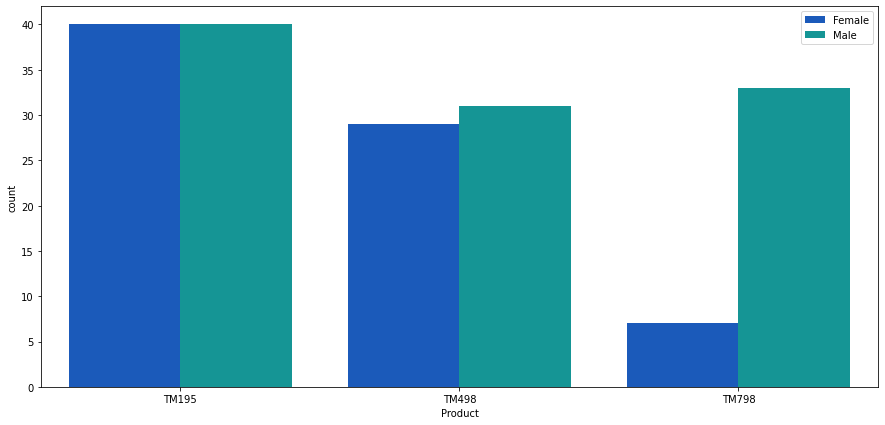

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = cardio_df, x = cardio_df["Product"],hue=cardio_df["Gender"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Equal number of male and female customers use the treadmill model number TM195.

Slightly higher males use the treadmill model TM498

More males use the TM798 model treadmill

## Product vs Marital Status

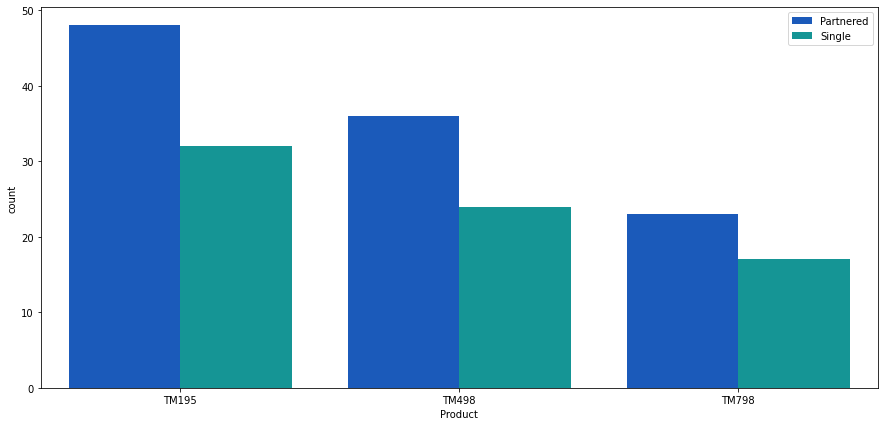

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = cardio_df, x = cardio_df["Product"],hue=cardio_df["MaritalStatus"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
TM195 product is the most popular among partnered customers and single customers

## Product vs Fitness

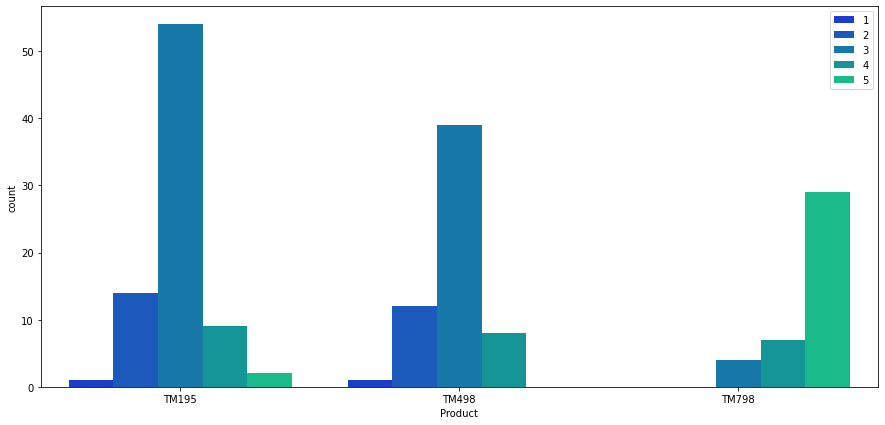

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = cardio_df, x = cardio_df["Product"],hue=cardio_df["Fitness"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Customers who use the TM798 model treadmill have higher self rated fitness than other products

Customers who use the TM195 treadmill have the highest number of customers who think that they are moderately fit



### **Multivariate Analysis**

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

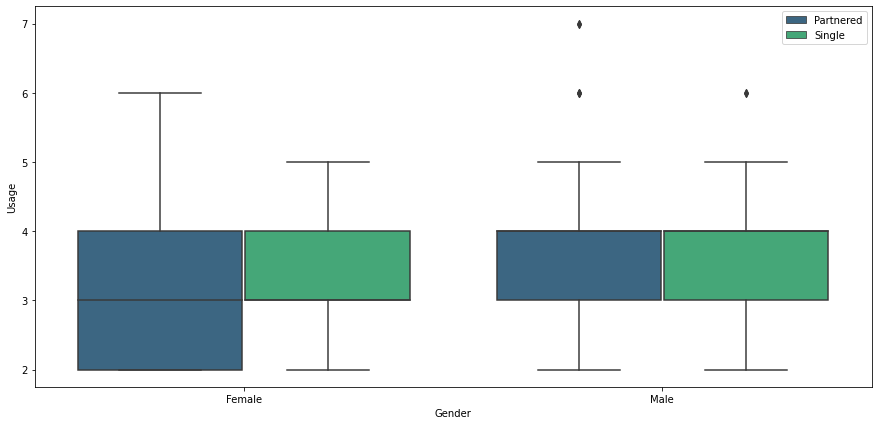

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Usage"],hue=cardio_df["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Partnered females have more spread of the average number of times to use the treadmill every week compared to single females

There is no difference in the usage of treadmill for male customers irrespective of their marital status

## Gender vs Income

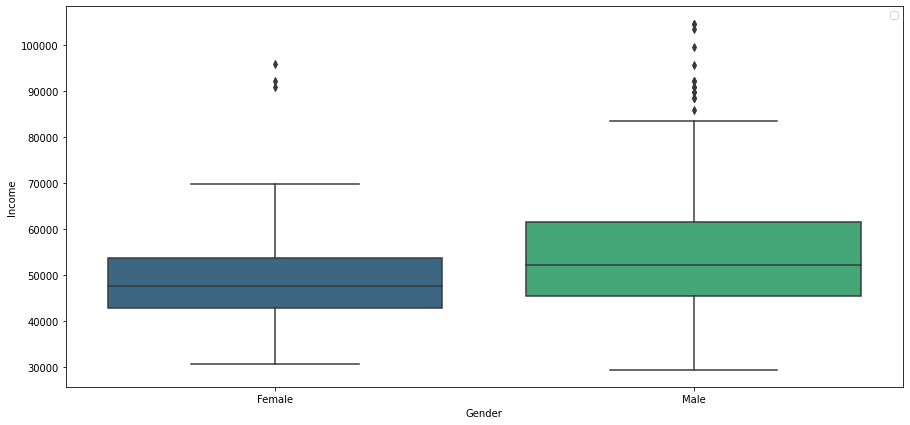

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Income"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
median income for males is higher than female customers

Generally, male customers fall within the higher income bracket than female customers

## Gender vs Income vs Marital Status

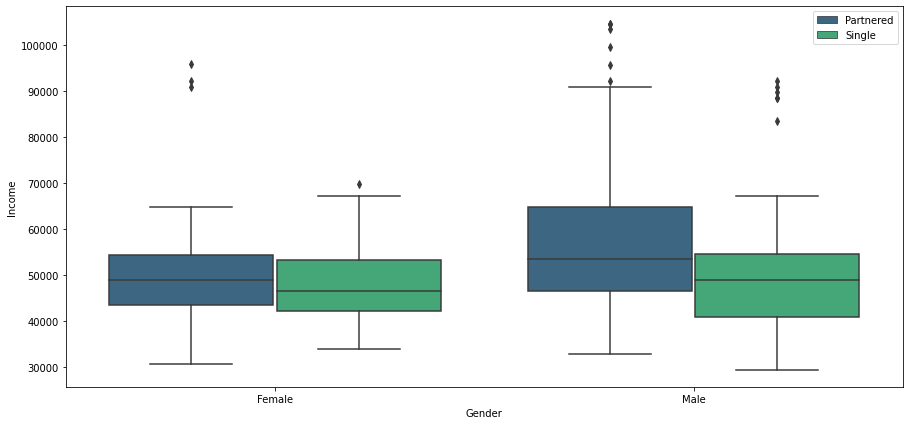

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Income"],hue=cardio_df["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Generally, more partnered males and females have higher income than their single counterparts

Married males have the highest median income and overall higest income

## Gender vs Miles

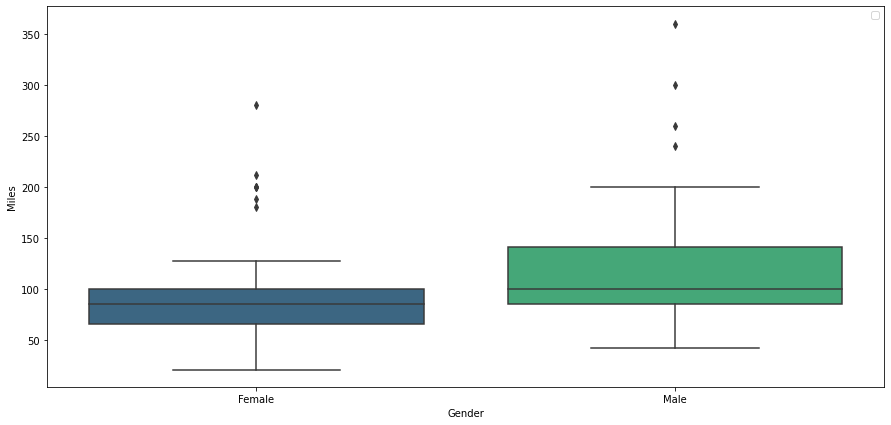

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Miles"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Male customers expect to run more miles than female customers

There are outliers in the number of miles that male and female customers expect to run

## Gender vs Miles vs Marital Status

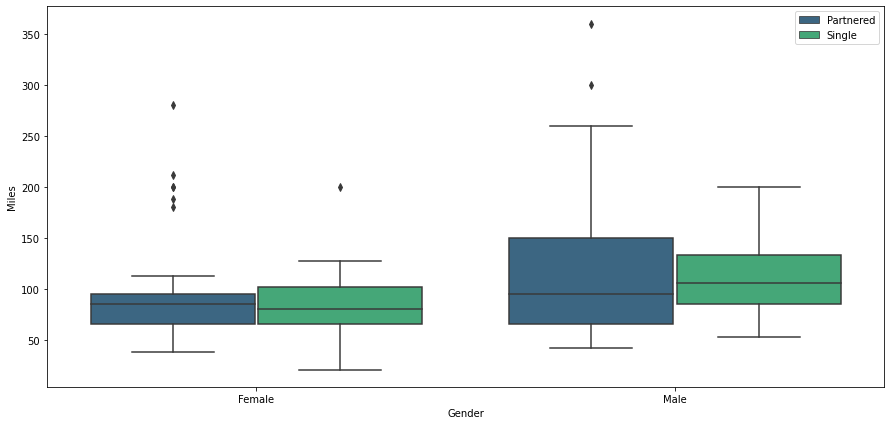

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Miles"],hue=cardio_df["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Single male customers have the highest median miles that they expect to run.

## Gender vs Miles vs Education

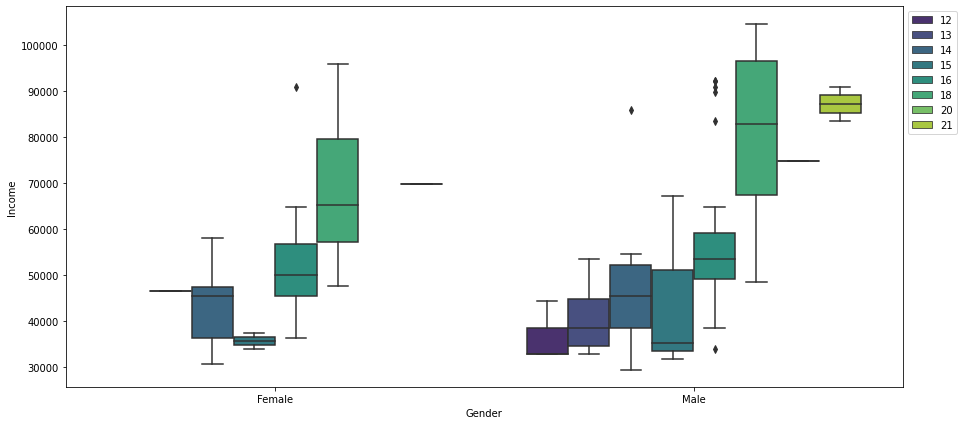

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = cardio_df, x = cardio_df["Gender"], y = cardio_df["Income"],hue=cardio_df["Education"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
The observation here still supports the initial insight that customers with 18 years education complteted have the highest income for males and females

## Age vs Miles vs Gender

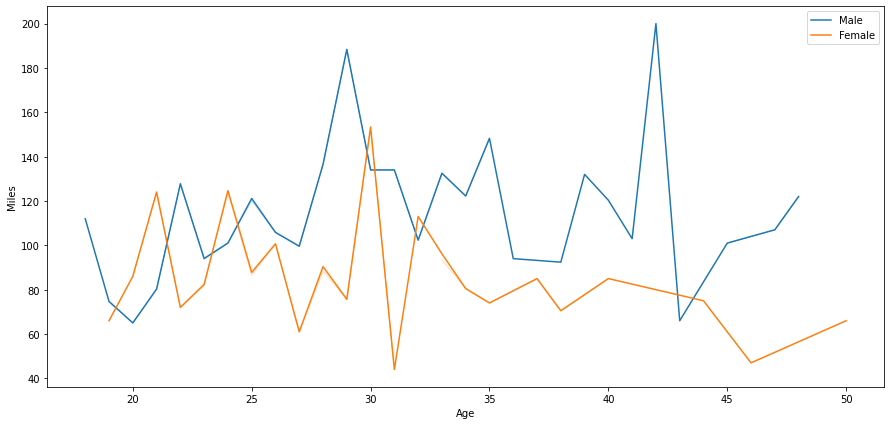

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio_df, x = cardio_df["Age"], y = cardio_df["Miles"],hue=cardio["Gender"],errorbar=('ci', 0))
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
No regular trend for age and miles expected to run

Peak miles expected to run for customers (males and females) age 28 - 30. and males ~42 years old

## Age vs Miles vs Marital Status

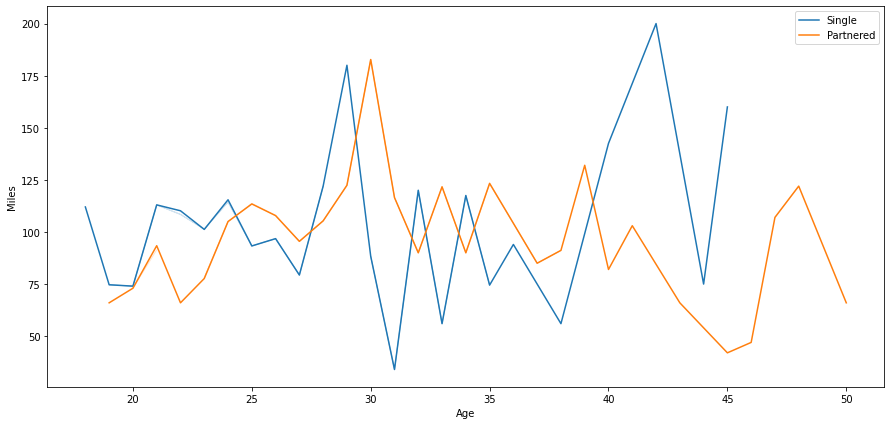

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio_df, x = cardio_df["Age"], y = cardio_df["Miles"],hue=cardio["MaritalStatus"],errorbar=('ci', 0))
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
This trend is similar to the above as the peak miles for single and partnered customers is ~ 28 - 30 years. 

Single customers have peak mile at age ~42. This could be attributed to the male customers

No obvious trend between the age and expected miles run on the treadmill

## Age vs Income vs Product

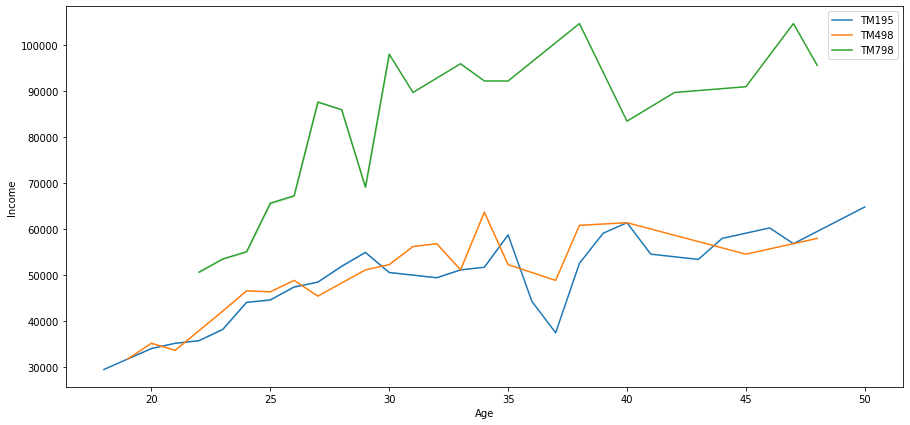

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = cardio_df, x = cardio_df["Age"], y = cardio_df["Income"],hue=cardio["Product"],errorbar=('ci', 0))
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Income increases with age
Customers who use the TM798 have the higher income

## Income vs Miles vs Education

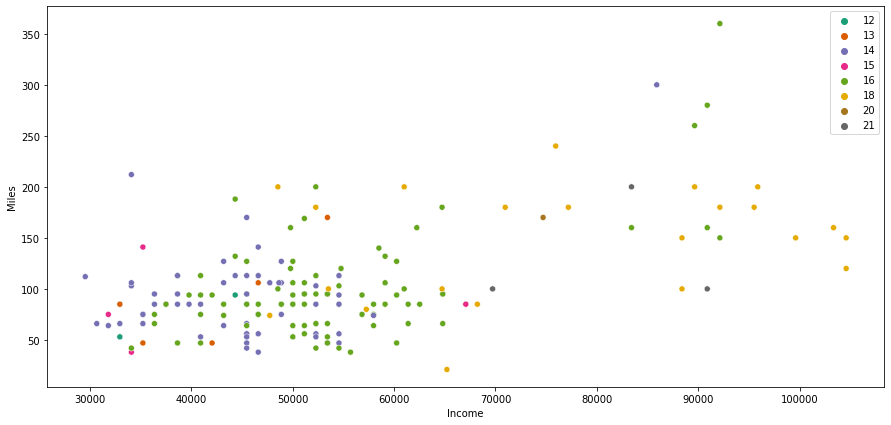

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio_df, x  = cardio_df["Income"], y = cardio_df["Miles"],hue=cardio_df["Education"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
There seems to be increase in the number of miles run as income increases

Education does not have significant impact on the number of miles customers expect to run

## Income vs Miles vs Product

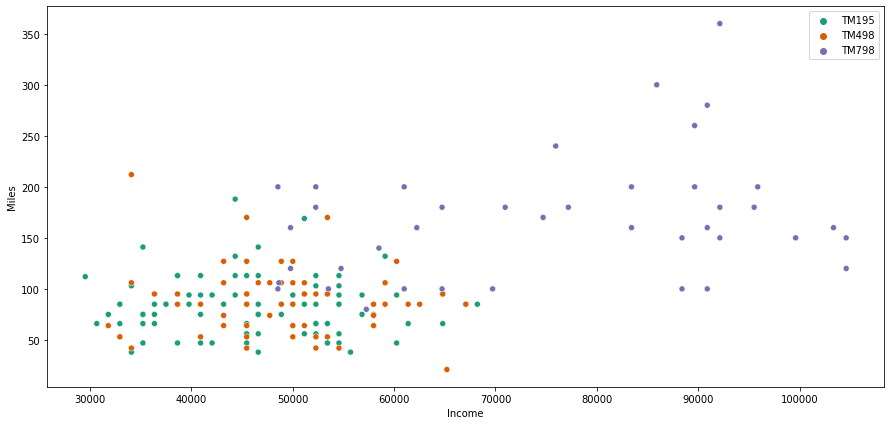

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = cardio_df, x  = cardio_df["Income"], y = cardio_df["Miles"],hue=cardio_df["Product"],palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Observations:
Custtomers who use TM798 model treadmill earn higher income and run more miles than customers who use the other two treadmill products

 Group the data for each product to build customer profiles and summarize the key characteristics of the customers based on the statistical summary.  

**Grouping data with respect to products to build customer profiles**

In [ ]:
cardio_df[cardio_df["Product"]=="TM195"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.0,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,NaN,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,NaN,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,NaN,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,53439.00000,94.000000


### Observations: 
**TM195 Customer**

Total of 80 customers use the TM195 product.

Mean income of customers in this group is $46,418

Average miles that customers using the TM195 product is 83 



In [ ]:
## Fill in the blank with appropriate column names and functions
cardio_df[cardio_df["Product"]=="TM498"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.0,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,4.0,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,NaN,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,NaN,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,NaN,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,NaN,53439.000000,106.000000


### Observations:
**TM498 Customer**


Total of 60 customers use the TM498 product.

Mean income of customers in this group is $48,973

Average miles that customers using the TM498 product is 88 

In [ ]:
## Fill in the blank with appropriate column names and functions
cardio_df[cardio_df["Product"]=="TM798"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.0,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,3.0,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,NaN,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,NaN,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,NaN,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,NaN,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,NaN,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,NaN,90886.00000,200.000000


### Observations:
**TM798 Customer**

Total of 40 customers use the TM798 product.

Mean income of customers in this group is $75,441

Average miles that customers using the TM195 product is 166 

 Summarize the key characteristics of each product based on the analysis performed. What recommendations would you like to share to help improve the business? 

#### **Conclusion:**
[Write a conclusion below of the analysis you have perfomred]

* TM195 treadmill is the most widely used product by customers irrespective of sex and marital status, while the TM798 is the least attractive to customers  
*  

#### **Recommendations:**
[Write your recommendations for the treadmill company below. You can add as many as you want]

*   Develope products and marketing strategies for younger customers since the average age of customers is relatively young i.e., below 30 years.
*  Promote health benefits of using treadmill to customers to improve customer fitness as customer inted to use treadmill 3.4 times a week on average. Happy customers are more likely to give good reviews, which increases sales
*  Offer a wide range of products to retain customers
*  High education of levels of customers mean that education related services such as personalized training or online education could be beneficial to Cardio Good Fitness
